In [2]:
import numpy as np
import tensorflow as tf
import pandas as pd
import os
import matplotlib as pt

2025-08-21 07:38:03.706373: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1755761884.059157      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1755761884.163113      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [5]:
dataset_path=os.listdir('/kaggle/input/pestdataset/PestData')
print(dataset_path)

print("Type of classes labels found ",len(dataset_path))

['beetle', 'mites', 'grasshopper', 'sawfly', 'stem_borer', 'mosquito', 'catterpillar', 'weevil', 'moth', 'armyworm', 'aphids', 'bollworm']
Type of classes labels found  12


In [6]:
import os
import pandas as pd

class_labels = []

# Check what folders are in the dataset
dataset_path = "/kaggle/input/pestdataset/PestData"
folders = os.listdir(dataset_path)
print("Available folders:", folders)

for folder in folders:
    images = os.listdir(os.path.join(dataset_path, folder))
    for img in images:
        class_labels.append((folder, os.path.join(dataset_path, folder, img)))

df = pd.DataFrame(class_labels, columns=['Labels', 'image'])
print(df.head(10))
print(df.tail(10))


Available folders: ['beetle', 'mites', 'grasshopper', 'sawfly', 'stem_borer', 'mosquito', 'catterpillar', 'weevil', 'moth', 'armyworm', 'aphids', 'bollworm']
   Labels                                              image
0  beetle  /kaggle/input/pestdataset/PestData/beetle/jpg_...
1  beetle  /kaggle/input/pestdataset/PestData/beetle/jpg_...
2  beetle  /kaggle/input/pestdataset/PestData/beetle/jpg_...
3  beetle  /kaggle/input/pestdataset/PestData/beetle/jpg_...
4  beetle  /kaggle/input/pestdataset/PestData/beetle/jpg_...
5  beetle  /kaggle/input/pestdataset/PestData/beetle/jpg_...
6  beetle  /kaggle/input/pestdataset/PestData/beetle/jpg_...
7  beetle  /kaggle/input/pestdataset/PestData/beetle/jpg_...
8  beetle  /kaggle/input/pestdataset/PestData/beetle/jpg_...
9  beetle  /kaggle/input/pestdataset/PestData/beetle/jpg_...
        Labels                                              image
4292  bollworm  /kaggle/input/pestdataset/PestData/bollworm/jp...
4293  bollworm  /kaggle/input/pestdatas

In [7]:
print("Total number of images in dataset: ",len(df))

label_count=df['Labels'].value_counts()
print(label_count)

Total number of images in dataset:  4302
Labels
moth            497
grasshopper     486
weevil          485
catterpillar    434
sawfly          300
mites           300
beetle          300
mosquito        300
stem_borer      300
armyworm        300
aphids          300
bollworm        300
Name: count, dtype: int64


In [8]:
import os
import cv2

path = '/kaggle/input/pestdataset/PestData'
dataset_path = os.listdir(path)

im_size = 224
images = []
labels = []

for folder in dataset_path:
    data_path = os.path.join(path, folder)  # Correct path joining
    filenames = os.listdir(data_path)

    for f in filenames:
        img = cv2.imread(os.path.join(data_path, f))
        img = cv2.resize(img, (im_size, im_size))
        images.append(img)
        labels.append(folder)


In [9]:
import numpy as np

# Convert to float32 and normalize in one step
images = np.asarray(images, dtype=np.float32) / 255.0
print(images.shape)

(4302, 224, 224, 3)


In [10]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
y=df['Labels'].values
print(y)

y_labelencoder=LabelEncoder()
y=y_labelencoder.fit_transform(y)
print(y)

['beetle' 'beetle' 'beetle' ... 'bollworm' 'bollworm' 'bollworm']
[2 2 2 ... 3 3 3]


In [11]:
y=y.reshape(-1,1)

from sklearn.compose import ColumnTransformer
ct=ColumnTransformer([('my_ohe', OneHotEncoder(), [0])], remainder='passthrough')
Y=ct.fit_transform(y).toarray()
print(Y[:5])
print(Y[15:])

[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[0. 0. 1. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [12]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

images, Y=shuffle(images,Y,random_state=1)

tarin_x, test_x, train_y, test_y=train_test_split(images, Y, test_size=0.2, random_state=415)


print(tarin_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(3441, 224, 224, 3)
(3441, 12)
(861, 224, 224, 3)
(861, 12)


In [13]:
from tensorflow.keras import layers
from tensorflow.keras.applications import EfficientNetB0

NUM_CLASSES=12
IMG_SIZE=224
size=(IMG_SIZE, IMG_SIZE)
inputs=layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
# Using model without transfer learning
outputs=EfficientNetB0(include_top=True, weights=None, classes=NUM_CLASSES)(inputs)

I0000 00:00:1755761986.670361      36 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1755761986.671230      36 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


In [14]:
model = tf.keras.Model(inputs,outputs)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetb0 (Functional)     │ (None, 12)             │     4,064,943 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,064,943 (15.51 MB)

 Trainable params: 4,022,920 (15.35 MB)

 Non-trainable params: 42,023 (164.16 KB)

In [23]:
hist = model.fit(tarin_x, train_y, epochs=55, verbose=2)

Epoch 1/55
108/108 - 15s - 138ms/step - accuracy: 0.9811 - loss: 0.0647
Epoch 2/55
108/108 - 16s - 145ms/step - accuracy: 0.9680 - loss: 0.0951
Epoch 3/55
108/108 - 15s - 139ms/step - accuracy: 0.9706 - loss: 0.0961
Epoch 4/55
108/108 - 14s - 134ms/step - accuracy: 0.9802 - loss: 0.0614
Epoch 5/55
108/108 - 14s - 133ms/step - accuracy: 0.9750 - loss: 0.0822
Epoch 6/55
108/108 - 15s - 135ms/step - accuracy: 0.9718 - loss: 0.0840
Epoch 7/55
108/108 - 15s - 138ms/step - accuracy: 0.9715 - loss: 0.0952
Epoch 8/55
108/108 - 15s - 140ms/step - accuracy: 0.9727 - loss: 0.0892
Epoch 9/55
108/108 - 15s - 138ms/step - accuracy: 0.9779 - loss: 0.0675
Epoch 10/55
108/108 - 15s - 136ms/step - accuracy: 0.9768 - loss: 0.0727
Epoch 11/55
108/108 - 15s - 135ms/step - accuracy: 0.9770 - loss: 0.0748
Epoch 12/55
108/108 - 15s - 137ms/step - accuracy: 0.9852 - loss: 0.0492
Epoch 13/55
108/108 - 15s - 138ms/step - accuracy: 0.9730 - loss: 0.0894
Epoch 14/55
108/108 - 15s - 137ms/step - accuracy: 0.9788 - 

In [24]:
import matplotlib.pyplot as plt

def plot_hist(hist):
  plt.plot(hist.history['accuracy'])
  #plt.plot(hist.history['val_accuracy'])
  plt.plot(hist.history['loss'])
  plt.title("model accuracy")
  plt.title("model accuracy")
  plt.ylabel("accuracy")
  plt.xlabel("epoch")
  plt.legend(["train", "validation"], loc="upper left")
  plt.show()

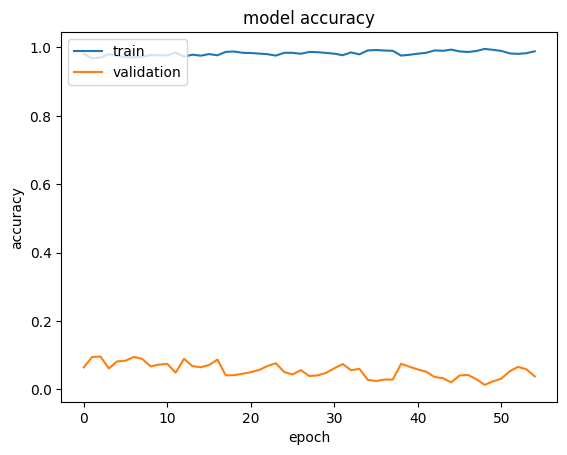

In [25]:
plot_hist(hist)

In [26]:
preds=model.evaluate(test_x, test_y)
print("Loss: "+str(preds[0]))
print("Test Accuracy: "+str(preds[0]))


27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.8415 - loss: 1.0175
Loss: 1.0878700017929077
Test Accuracy: 1.0878700017929077


In [27]:

y_pred_probs = model.predict(test_x)           # Shape: (num_samples, num_classes)
y_pred = np.argmax(y_pred_probs, axis=1)       # Convert probabilities to class indices


27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step


In [28]:
y_true = np.argmax(test_y, axis=1)


Confusion Matrix:
 [[65  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 65  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 65  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 62  0  0  0  0  0  0  0  0]
 [ 2  0  0  0 23 21  4  1 19  0  4 21]
 [ 3  3  1  0  5 61  0  0  4  1  5  4]
 [ 0  0  0  0  0  0 51  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 58  0  0  0  0]
 [ 0  0  0  0  5 10  0  0 71  0  2  5]
 [ 0  0  0  0  0  0  0  0  0 72  0  0]
 [ 0  0  3  0  3  0  0  0  0  0 59  0]
 [ 1  2  1  0  1  4  0  1  6  1  0 66]]


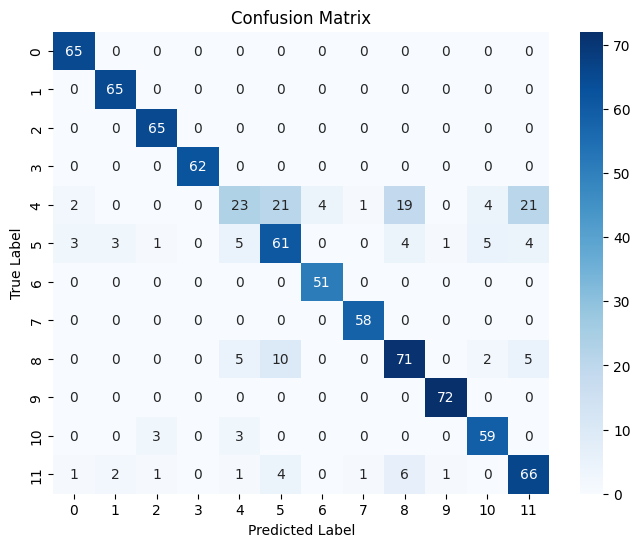


Classification Report:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96        65
           1       0.93      1.00      0.96        65
           2       0.93      1.00      0.96        65
           3       1.00      1.00      1.00        62
           4       0.62      0.24      0.35        95
           5       0.64      0.70      0.67        87
           6       0.93      1.00      0.96        51
           7       0.97      1.00      0.98        58
           8       0.71      0.76      0.74        93
           9       0.97      1.00      0.99        72
          10       0.84      0.91      0.87        65
          11       0.69      0.80      0.74        83

    accuracy                           0.83       861
   macro avg       0.84      0.87      0.85       861
weighted avg       0.82      0.83      0.82       861



In [29]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:\n", cm)

# Optional: visualize it
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Optional: classification report
print("\nClassification Report:\n", classification_report(y_true, y_pred))